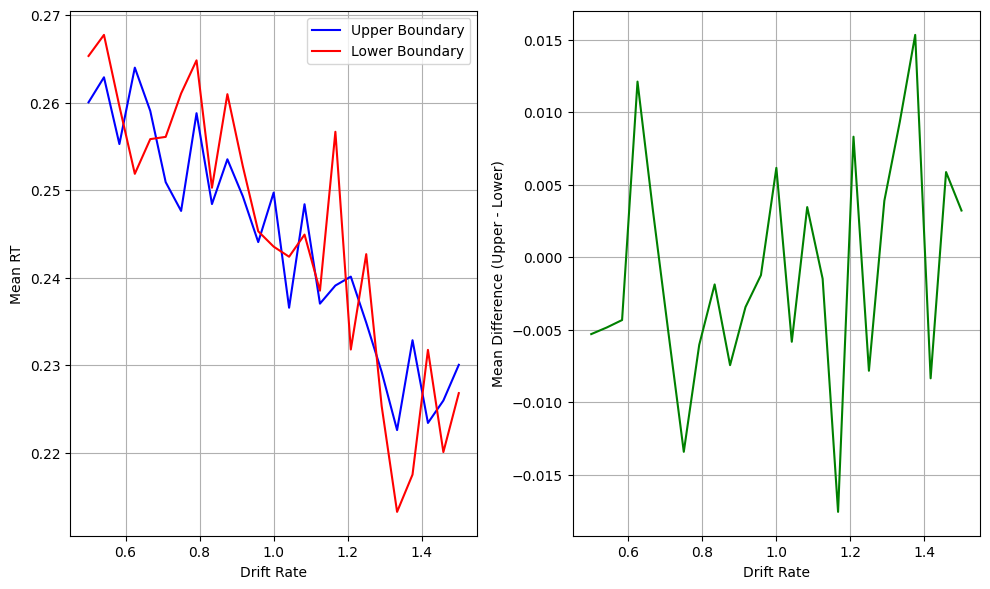

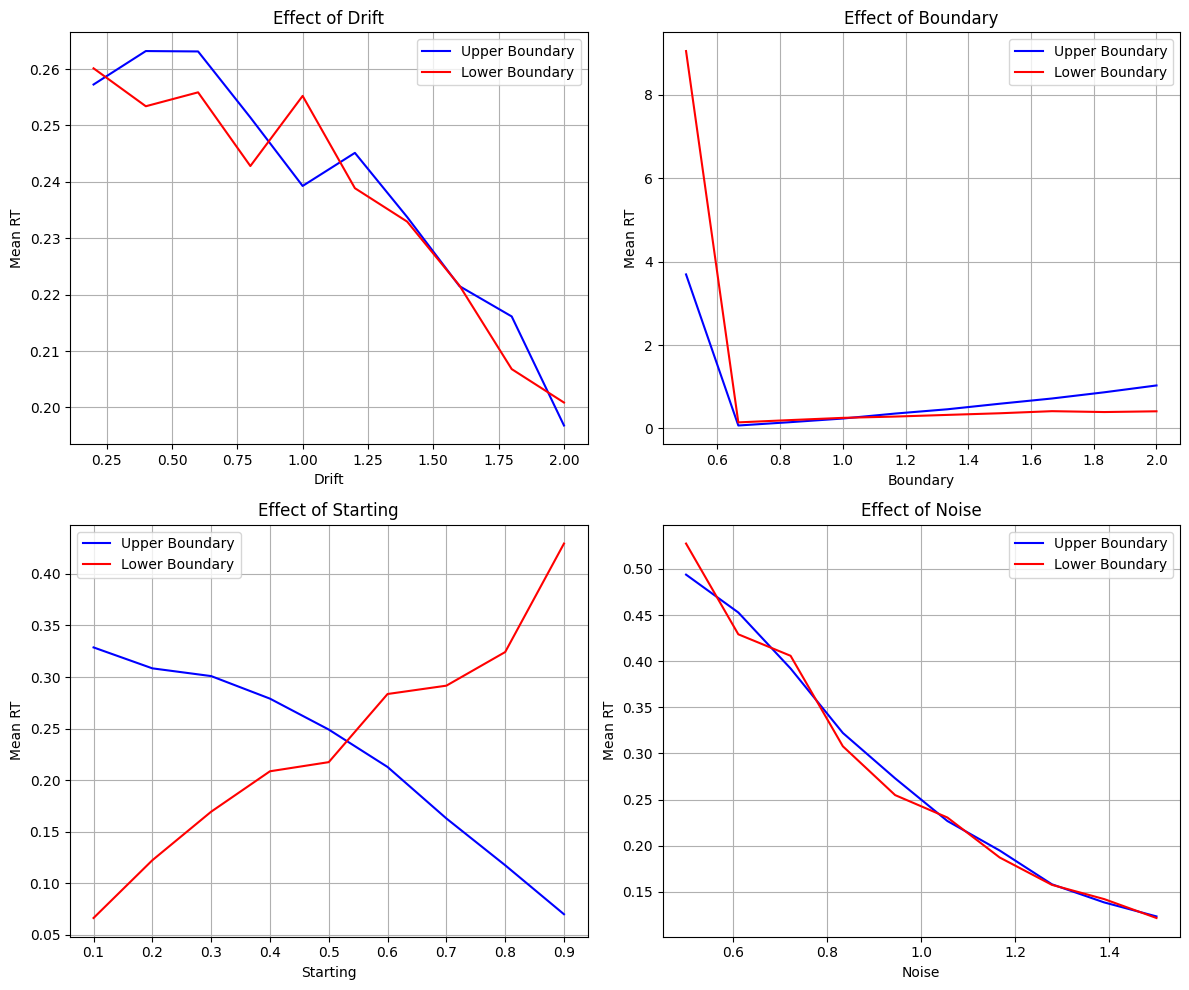

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_ddm(n_simulations, drift_rate, boundary, starting_point, noise=1.0, dt=0.001, max_time=10.0):
    max_steps = int(max_time / dt)
    rts = np.zeros(n_simulations)
    choices = np.zeros(n_simulations, dtype=int)

    for i in range(n_simulations):
        position = starting_point
        for step in range(max_steps):
            position += drift_rate * dt + noise * \
                np.sqrt(dt) * np.random.normal()

            if position >= boundary:
                rts[i] = step * dt
                choices[i] = 1
                break
            elif position <= 0:
                rts[i] = step * dt
                choices[i] = 0
                break

        if rts[i] == 0:
            rts[i] = max_time
            choices[i] = np.random.randint(0, 2)

    return rts, choices


def analyze_simulations(rts, choices):
    upper_rts = rts[choices == 1]
    lower_rts = rts[choices == 0]

    results = {
        'mean_upper': np.mean(upper_rts) if len(upper_rts) > 0 else np.nan,
        'mean_lower': np.mean(lower_rts) if len(lower_rts) > 0 else np.nan,
        'std_upper': np.std(upper_rts) if len(upper_rts) > 0 else np.nan,
        'std_lower': np.std(lower_rts) if len(lower_rts) > 0 else np.nan,
        'prop_upper': len(upper_rts) / len(rts)
    }
    return results


def explore_drift_effect():
    n_simulations = 2000
    drift_rates = np.linspace(0.5, 1.5, 25)
    results = {'mean_upper': [], 'mean_lower': [],
               'std_upper': [], 'std_lower': [], 'prop_upper': []}

    for drift in drift_rates:
        rts, choices = simulate_ddm(n_simulations, drift, 1.0, 0.5)
        stats = analyze_simulations(rts, choices)
        for key in results:
            results[key].append(stats[key])

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(drift_rates, results['mean_upper'], 'b-', label='Upper Boundary')
    plt.plot(drift_rates, results['mean_lower'], 'r-', label='Lower Boundary')
    plt.xlabel('Drift Rate')
    plt.ylabel('Mean RT')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    mean_diff = np.array(results['mean_upper']) - \
        np.array(results['mean_lower'])
    plt.plot(drift_rates, mean_diff, 'g-')
    plt.xlabel('Drift Rate')
    plt.ylabel('Mean Difference (Upper - Lower)')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('drift_effect.png')

    return drift_rates, results


def explore_all_parameters():
    param_ranges = {
        'drift': np.linspace(0.2, 2.0, 10),
        'boundary': np.linspace(0.5, 2.0, 10),
        'starting': np.linspace(0.1, 0.9, 9),
        'noise': np.linspace(0.5, 1.5, 10)
    }

    n_simulations = 2000
    base_params = {'drift': 1.0, 'boundary': 1.0,
                   'starting': 0.5, 'noise': 1.0}
    all_results = {}

    for param_name, param_values in param_ranges.items():
        results = {'mean_upper': [], 'mean_lower': [],
                   'std_upper': [], 'std_lower': [], 'prop_upper': []}

        for val in param_values:
            params = base_params.copy()
            params[param_name] = val

            rts, choices = simulate_ddm(
                n_simulations,
                params['drift'],
                params['boundary'],
                params['starting'],
                params['noise']
            )

            stats = analyze_simulations(rts, choices)
            for key in results:
                results[key].append(stats[key])

        all_results[param_name] = results

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    param_names = list(param_ranges.keys())

    for i, param in enumerate(param_names):
        row, col = i // 2, i % 2
        ax = axes[row, col]

        ax.plot(param_ranges[param], all_results[param]
                ['mean_upper'], 'b-', label='Upper Boundary')
        ax.plot(param_ranges[param], all_results[param]
                ['mean_lower'], 'r-', label='Lower Boundary')
        ax.set_xlabel(f'{param.capitalize()}')
        ax.set_ylabel('Mean RT')
        ax.set_title(f'Effect of {param.capitalize()}')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.savefig('parameter_effects.png')

    return param_ranges, all_results


if __name__ == "__main__":
    drift_rates, drift_results = explore_drift_effect()
    param_ranges, all_results = explore_all_parameters()